In [280]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
import matplotlib

<Figure size 720x1440 with 0 Axes>

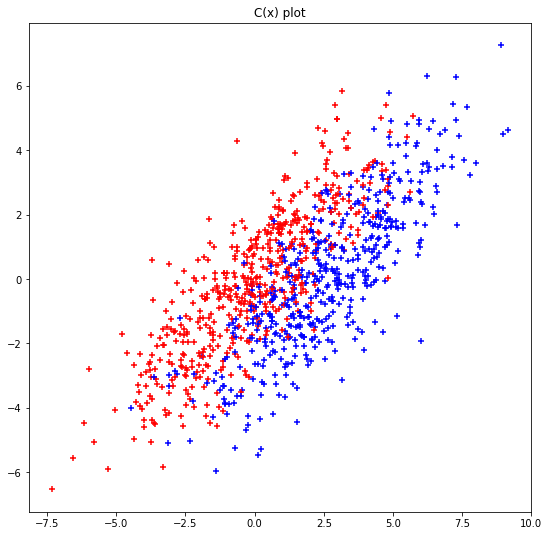

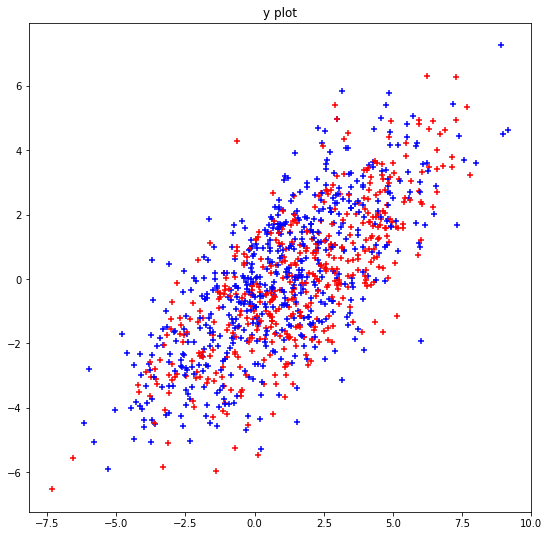

<Figure size 720x1440 with 0 Axes>

In [288]:
AL = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4),np.cos(np.pi/4)]])
AR = np.array(([3,0],[0,1]))
A = np.dot(AL,AR)

u1 = np.array(([0,0]))
u2 = np.array(([2.5,0]))

# Cu = []

def generateSamples(total_samples):
    Cx = np.random.choice([1,2],size=[total_samples],replace=True,p=[0.5,0.5])
#     print (Cx)
    u = np.random.normal(0,1,size=[total_samples,2])
    #print(u)
    x = []
    y_list = []
    fig = plt.figure(figsize=(10,20))
    for i in range(total_samples):
        if Cx[i] == 1:
            sample = np.dot(A,u[i]) + u1
            y = np.random.choice([0,1],p=[0.3,0.7])
#             plt.subplot(211),plt.scatter(sample[0],sample[1], c= "blue",marker="+"),plt.title("C(x)")
#             if y == 1:
#                 plt.subplot(212),plt.scatter(sample[0],sample[1], c= "blue",marker="+"),plt.title("y")
#             elif y == 0:
#                 plt.subplot(212),plt.scatter(sample[0],sample[1], c= "red",marker="+"),plt.title("y")
        elif Cx[i] == 2:
            sample = np.dot(A,u[i]) + u2
            y = np.random.choice([0,1],p=[0.6,0.4])
#             plt.subplot(211),plt.scatter(sample[0],sample[1], c = "red",marker="+"),plt.title("C(x)")
#             if y == 1:
#                 plt.subplot(212),plt.scatter(sample[0],sample[1], c= "blue",marker="+"),plt.title("y")
#             elif y == 0:
#                 plt.subplot(212),plt.scatter(sample[0],sample[1], c= "red",marker="+"),plt.title("y")
      
        x.append(sample)
        y_list.append(y)
        
    return Cx,x,y_list
'''
    for i in range(len(thousand_memberships)):
        current = np.dot(A,thousand_normals[i])
        if(thousand_memberships[i]==1):  # part of 1
            current+=[0,0]  # you can skip this
            y_draw = np.random.choice([0,1],p=[0.3,0.7])
        if(thousand_memberships[i]==2):  # part of 2
            current+=[2.5,0]
            y_draw = np.random.choice([0,1],p=[0.6,0.4])
        values_list.append(copy.deepcopy(current)) # is not a primitive 
        y_draws.append(y_draw) # is most definitely a primitive. it's an integer.
    return values_list, thousand_memberships, y_draws


'''
    

        

Cx1,x1,y_list1 = generateSamples(1000)
colors = ['red','blue']
x_values,y_values = zip(*x1) #unzipping

fig, ax = plt.subplots(1,1, figsize=(9,9))
scatterplot = ax.scatter(x_values, y_values, c=Cx1,cmap=matplotlib.colors.ListedColormap(colors),marker = "+")
ax.set_title('C(x) plot')
plt.show()
fig, ax = plt.subplots(1,1, figsize=(9,9))
plt.scatter(x_values, y_values, c=y_list1, cmap=matplotlib.colors.ListedColormap(colors),marker = "+")
ax.set_title('y plot')
plt.show()
# print(Cx1)
# print(y_list1)




In [309]:
# print(x2)


Cx2,x2,y_list2 = generateSamples(500)

nbrs = KNeighborsClassifier(n_neighbors = 1).fit(x2,Cx2)
y_pred = nbrs.predict(x1)

print(confusion_matrix(Cx1,y_pred))
print(classification_report(Cx1,y_pred)) 
print(accuracy_score(Cx1,y_pred))

# distance , indices = nbrs.kneighbors(x2)
# print (distance)
# print(indices)

[[375 139]
 [108 378]]
             precision    recall  f1-score   support

          1       0.78      0.73      0.75       514
          2       0.73      0.78      0.75       486

avg / total       0.75      0.75      0.75      1000

0.753


<Figure size 720x1440 with 0 Axes>

In [ ]:
print ('the 1-nearest neighbor classifier performs worse as it overfits the data. When the test data is tested, ')

Text(0,0.5,'Mean Error')

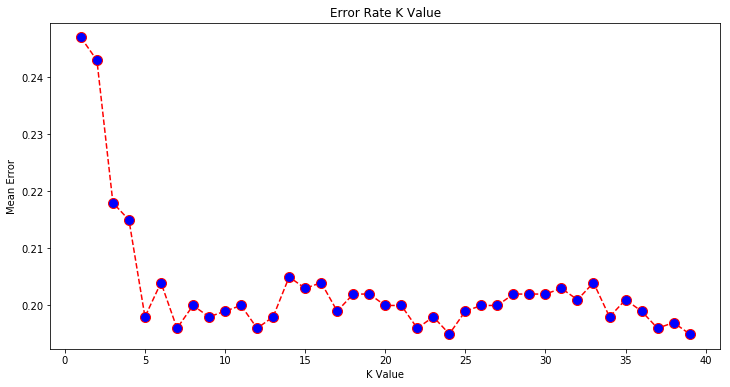

In [310]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x2, Cx2)
    pred_i = knn.predict(x1)
    error.append(np.mean(pred_i != Cx1))
    
plt.figure(figsize=(12, 6))  
4plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

Goal: to understand how p(x, y) looks like when data is generated from 2 (or k) clusters of (x, y) such that for every cluster x follows some distribution and the distribution of y depends only on the cluster index c(x) {1,2}

$$\begin{equation*}
p(x,y)
\end{equation*}$$$$\begin{equation*}
 = p(x,y,c(x)=1) + p(x,y,c(x)=2)
\end{equation*}$$$$\begin{equation*}
= p(x).(p(y,c(x)=1) + p(y,c(x)=2))
\end{equation*}$$$$\begin{equation*}
= p(x).(p(y=0,c(x)=1) + p(y=0,c(x)=2)) + p(x).(p(y=1,c(x)=1) + p(y=1,c(x)=2))
\end{equation*}$$$$\begin{equation*}
= (f(x|c(x)=1).p(c(x)=1) + (f(x|c(x)=2).p(c(x)=2))
* (p(y=0,c(x)=1) + p(y=0,c(x)=2) + p(y=1,c(x)=1) + p(y=1,c(x)=2)) 
\end{equation*}$$
since probability of c(x) = 1 and c(x) = 2 at the same time = 0,
$$\begin{equation*}
p(x,y)
\end{equation*}$$$$\begin{equation*}
= f(x|c(x)=1).p(c(x)=1).(p(y=0,c(x)=1) + p(u=1,c(x)=1))
+ f(x|c(x)=2).p(c(x)=2).(p(y=0,c(x)=2) + p(u=1,c(x)=2))
\end{equation*}$$
Thus,
$$\begin{equation*}
p(x,y)
\end{equation*}$$$$\begin{equation*}
= 0.5(0.2+0.8)f(x|c(x)=1) + 0.5(0.7+0.3)f(x|c(x)=2)
\end{equation*}$$$$\begin{equation*}
= 0.5f(x|c(x)=1) + 0.5f(x|c(x)=2)
\end{equation*}$$$$\begin{equation*}
= f(x)
\end{equation*}$$